In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
# simulate the infected patients number for a specific period T_total
# this function simulate not strictly numbers of X_n in T_total time, given fixed Lambda, P, Alpha
# Random Horizon: means that the whole trajectory stop once X_n hits 0
# @ param N: is the number of total population can be infected
# @ param t_0: a number that is the time when starting the T-time simulation
# @ param x_0: initial infected patients (greater than 0)
# @ param T_total: is total time for this simulation
# @ param maxi_time: is the maximum time that the whole simulation process can go, can be infinity
# @ param H: is the hospital capacity
def simulation_infected(la, p, al, N, t_0, x_0, T_total, H, maxTime):
    # initialize time and infected patient
    # bind variables to the initial conditions
    x_n = x_0
    # make sure the start is not 0
#     assert(x_n!=0)
    # assign initial time to a know value, noted it can start from
    # not just at 0 time
    t_n = t_0
    # introduce T_H := "the total time above the hospital capacity"
    T_H = 0
    # initiate X_n process trajectory and corresponding T_n process
    X_trajectory = []
    T_trajectory = []
    # loop
    # break condition
    # @ condition1: when the time exceeds the maximum time
    # @ condition2: when the infected patients go to zero
    # @ condition3: when the whole populations are infected! :(
    while (x_n != 0 and
           x_n < N
          ):
        i = x_n
        # q i _ i+1
        q_forward_i = la*p*2*x_n*(N-i)/(N*(N-1))
        # q i _ i-1
        q_backward_i = al*i
        # waiting time rate v_i = (q i _ i+1) + (q i _ i-1)
        v_i = q_forward_i + q_backward_i
        t_i = np.random.exponential(v_i)
        # calculate T_H before jumping
        if (x_n >= H):
            T_H = min(T_total ,T_H+t_i)
        # jumping probability to STATE i+1 is (q i _ i+1)/v_i
        jump = np.random.binomial(n=1,p=(q_forward_i/v_i))
        
        if ((t_n+t_i-t_0) > T_total):
            print(x_n)
            X_trajectory.append(x_n)
            T_trajectory.append(T_total+t_0)
            return X_trajectory, T_trajectory, T_H, T_total
        
        # change x_n
        if (jump ==1):
            x_n += 1
        elif (jump == 0):
            x_n -= 1            
        
        # add the jumped X_n at t_i time
        X_trajectory.append(x_n)
        # increase time
        T_trajectory.append(t_n+t_i)
        t_n = t_n+t_i
        
        # if hits then zero return
        if (x_n == 0):
            return X_trajectory, T_trajectory, T_H, T_total        
        
    # also return when the while break condition met
    return X_trajectory, T_trajectory, T_H, T_total

In [29]:
# function takes that updates lambda with negative sign
def update_lambda(_lambda, T_H, T, Beta ,stepsize):
    Y_n = T_H/T
    _lambda -= float(stepsize) * (Y_n-Beta)
    return _lambda

# function that updates p with negative sign
def update_p(_p, T_H, T, Beta, stepsize):
    Y_n = T_H/T
    _p -= float(stepsize) * (Y_n-Beta)
    return _p

# function that updates alpha with positive sign
def update_alpha(_alpha, T_H, T, Beta, stepsize):
    Y_n = T_H/T
    _alpha += float(stepsize) * (Y_n-Beta)
    return _alpha

# @ x_0 initial infected patient
# @ _lambda the inital lambda value
# @ _alpha the inital alpha value
# @ p the inital p value 
# @ C is the hospital capacity 
# @ Beta is the target tracking probability 
# @ K is the batch size of each estimate
# @ The batch is defined here as the total K days of simulation starting from a time point
# @ It is not defined as the number of replications of each simulation with T days
# these are all set arbitary atm
x_0 = 10
_lambda = 0.1
_alpha = 1e-8
_p = 0.9
K = 14
H = 2e4
Beta = 0.05
N = 4e6
maxTime = 3e4                                            
stepsize = [0.000001, 2e-11]


trajectory_lambda = []
trajectory_alpha = []
trajectory_X_n = []
trajectory_T_n = []
# use iteration of 5000 as end of all sequential update
iteration = 0
x_n = x_0
t_n = 0

while iteration < 5000:
    
    # simulate K days of X_n obtain T_H/T, starting from t_0 = 0 and x_0 = x_n
    X_n,T_n,T_H,T = simulation_infected(_lambda,_p,_alpha,N,t_n,x_n,K,H,maxTime)
    
    # use K days simulation to update lambda and alpha
    _alpha = max(0,update_alpha(_alpha,T_H,T,Beta,stepsize[1]))
    _lambda = max(0, update_lambda(_lambda,T_H,T,Beta,stepsize[0]))
    
    # update the objective simulation trajectory
    trajectory_alpha.append(_alpha)
    trajectory_lambda.append(_lambda)
    trajectory_X_n.extend(X_n)
    trajectory_T_n.extend(T_n)
    
    # update x_n and t_n using the last (latest) element of objective simulation X_n and T_n
    x_n = X_n[-1]
    t_n = T_n[-1]
    
    # if x_n is zero, jump up to x_0, restart simulation
    if (x_n==0):
        x_n = x_0
    
    iteration+=1
    

17959
25370
31154
35954
40297
44323
47756
50900
53948
56958
59682
62286
64856
67254
69603
71811
73885
76006
78012
80032
81963
83886
85760
87514
89273
91060
92758
94386
96025
97611
99208
100882
102387
103905
105448
106890
108390
109826
111239
112659
113995
115371
116666
118094
119388
120672
121917
123065
124333
125614
126774
128077
129305
130523
131680
132899
134027
135253
136425
137615
138683
139820
140906
141997
143097
144110
145126
146135
147156
148160
149179
150179
151263
152278
153263
154222
155129
156108
157092
158084
158980
159912
160863
161833
162723
163630
164512
165374
166230
167067
167930
168789
169621
170542
171514
172371
173189
173928
174888
175744
176554
177331
178107
178927
179764
180529
181395
182216
183033
183860
184609
185430
186191
186939
187695
188501
189244
189990
190724
191460
192171
192895
193645
194382
195069
195877
196573
197233
197945
198654
199311
200029
200797
201471
202172
202826
203534
204204
204899
205537
206236
206894
207541
208211
208845
209480
210154
21

430942
431021
431042
431065
431070
431111
431164
431213
431292
431332
431344
431402
431430
431482
431495
431521
431579
431603
431625
431679
431723
431773
431806
431813
431871
431911
431904
431953
431994
432056
432106
432148
432204
432243
432243
432286
432315
432312
432354
432376
432423
432461
432509
432540
432549
432600
432637
432690
432708
432708
432745
432776
432805
432858
432897
432945
432951
432979
432996
433004
433044
433093
433130
433167
433215
433250
433266
433295
433321
433380
433381
433411
433425
433408
433438
433470
433498
433526
433545
433580
433620
433650
433688
433677
433699
433728
433769
433794
433809
433811
433884
433961
433961
433992
434018
434028
434042
434083
434091
434095
434104
434142
434184
434255
434248
434238
434287
434282
434292
434322
434320
434347
434379
434392
434414
434429
434435
434467
434503
434494
434488
434494
434472
434521
434517
434519
434535
434593
434592
434632
434672
434672
434680
434701
434726
434739
434750
434805
434786
434823
434832
434845
434862

404127
404060
403970
403907
403829
403758
403688
403657
403601
403530
403475
403407
403336
403295
403222
403143
403083
403002
402950
402914
402877
402797
402744
402695
402629
402584
402535
402488
402431
402373
402342
402285
402218
402173
402109
402042
401977
401925
401868
401801
401740
401691
401601
401529
401469
401381
401314
401233
401177
401144
401091
401036
400951
400872
400833
400729
400625
400562
400488
400405
400316
400253
400174
400096
400051
399990
399886
399815
399756
399693
399630
399573
399487
399413
399345
399299
399248
399163
399106
399004
398968
398946
398852
398788
398734
398644
398589
398522
398464
398392
398325
398262
398213
398125
398060
398021
397967
397911
397846
397787
397726
397663
397610
397543
397461
397381
397309
397240
397192
397162
397106
397032
396977
396889
396815
396773
396701
396610
396537
396439
396378
396304
396223
396155
396093
396011
395933
395847
395800
395699
395659
395619
395547
395445
395333
395234
395166
395073
395025
394953
394886
394818
394744

290930
290777
290620
290480
290335
290240
290074
289960
289832
289707
289601
289508
289369
289210
289062
288942
288827
288725
288600
288461
288316
288140
288017
287868
287766
287642
287482
287369
287216
287092
286918
286781
286618
286468
286325
286177
286039
285893
285726
285591
285458
285347
285214
285072
284916
284742
284583
284445
284314
284163
284025
283899
283780
283663
283520
283362
283245
283113
282997
282852
282748
282610
282471
282336
282228
282110
281939
281757
281637
281502
281391
281276
281120
280977
280814
280669
280512
280370
280278
280118
279994
279833
279729
279589
279449
279305
279182
279065
278924
278772
278648
278516
278387
278251
278128
278035
277935
277827
277717
277550
277406
277263
277139
277026
276897
276751
276625
276506
276341
276180
276009
275854
275730
275611
275465
275332
275206
275039
274872
274704
274601
274453
274309
274197
274037
273916
273768
273633
273524
273380
273259
273102
272991
272832
272683
272563
272410
272250
272119
271943
271742
271603
271477

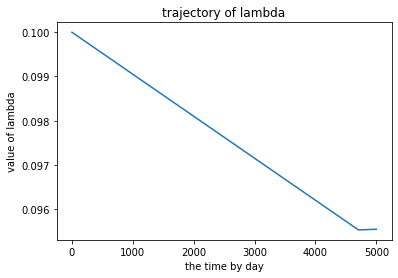

In [30]:
plt.xlabel("the time by day")
plt.ylabel("value of lambda")
plt.title("trajectory of lambda")
plt.plot(trajectory_lambda)
# plt.savefig("trajectory of lambda, experiment3, 2e4")

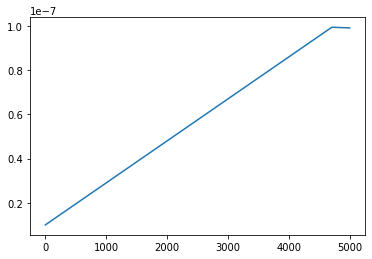

In [31]:
plt.clf()
plt.plot(trajectory_alpha)
# plt.savefig("trajectory of alpha, experiment3, 2e4")

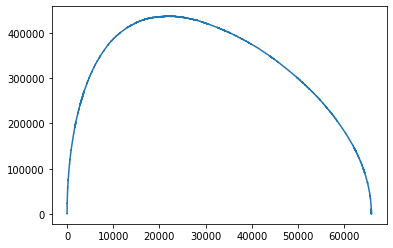

In [32]:
plt.plot(trajectory_T_n,trajectory_X_n)
# plt.savefig("trajectory of simulation, experiment3, 2e4")